In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/loan_data.csv')
data1 = pd.read_csv('../data/Titanic-Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
for column in data.columns:
    if data[column].isna().any()==True:
        print(f'{column}, \t{data[column].isnull().sum()}, \t{data[column].dtype}')
    else:
        ('There is no missing values present in this dataset')

Gender, 	13, 	object
Married, 	3, 	object
Dependents, 	15, 	object
Self_Employed, 	32, 	object
LoanAmount, 	22, 	float64
Loan_Amount_Term, 	14, 	float64
Credit_History, 	50, 	float64


In [7]:
for column in data1.columns:
    if data1[column].isna().any()==True:
        print(f'{column}, \t{data1[column].isnull().sum()}, \t{data1[column].dtype}')
    else:
        ('There is no missing values present in this dataset')

Age, 	177, 	float64
Cabin, 	687, 	object
Embarked, 	2, 	object


## __Three types of missing values__

1. Missing completely at random (MCAR):
- This is when the missingness of a value is unrelated to any other variable, including the value itself. 
- An example of MCAR could be missing data on a survey question about income where the respondents who didn't answer that question had the same income distribution as those who did answer.

2. Missing at random (MAR):
- This is when the missingness of a value is related to other observed variables, but not to the value itself. 
- An example of MAR could be missing data on a survey question about income where respondents who didn't answer that question had lower income levels but only because they were younger and just starting their careers, and younger people in general have lower incomes than older people.

3. Missing not at random (MNAR):
- This is when the missingness of a value is related to the value itself, and cannot be explained by any observed variables. - An example of MNAR could be missing data on a survey question about income where respondents who didn't answer that question had higher income levels and didn't want to reveal it.

## __1. Don't handle Missing Values__

## __2. Mean Median Mode Imputation__

### using fillna() method in pandas

`data[column_name].fillna(value='your_value', inplace=True)`

### mode imputation for categorical variable

In [8]:
data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [9]:
data['Gender'].fillna(value='Male')

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

### median imputation for categorical variable

<AxesSubplot:>

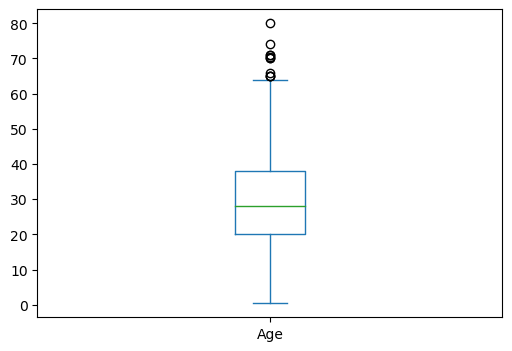

In [10]:
data1['Age'].plot(kind='box', figsize=(6, 4))

<AxesSubplot:ylabel='Frequency'>

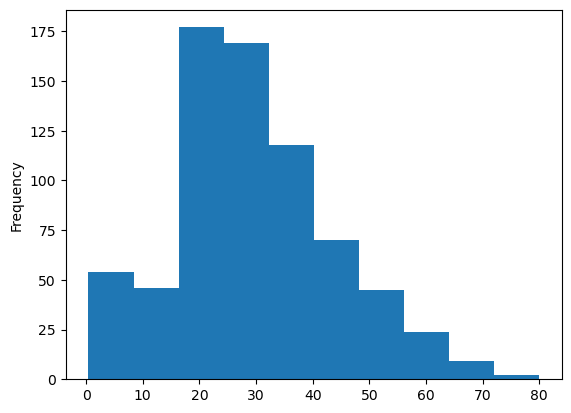

In [11]:
data1['Age'].plot(kind='hist')

In [12]:
data1['Age'].median()

28.0

In [13]:
data1['Age'].fillna(value=28.0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

#### Median imputation Pros and Cons

##### Pros:

- Simple and easy to implement.
- Less sensitive to outliers or extreme values than mean imputation, since it uses the middle value instead of the average.
- Preserves the sample size and avoids bias in the median of the data.
- Can be used for both continuous and categorical data (by converting the data to a numeric format).

##### Cons:

- Median imputation assumes that the data are missing completely at random (MCAR), which may not always be the case in practice.
- Median imputation can distort the distribution of the data, especially if there are many missing values or if the data are heavily skewed.
- Median imputation can lead to underestimation of the variance or standard deviation of the data, which can affect subsequent statistical analyses.
- Median imputation can result in biased estimates and inaccurate results, especially if the missing data are not missing at random (MNAR).

<AxesSubplot:ylabel='Frequency'>

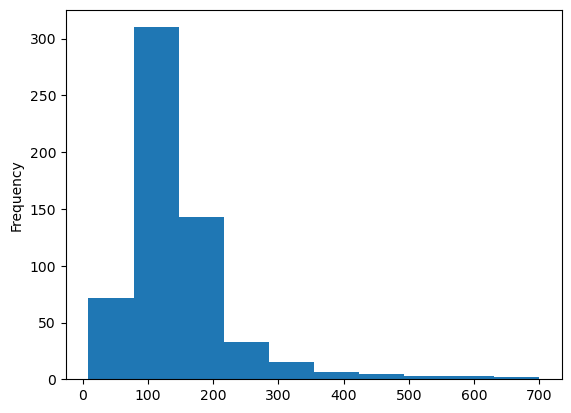

In [14]:
data['LoanAmount'].plot(kind='hist')

<AxesSubplot:>

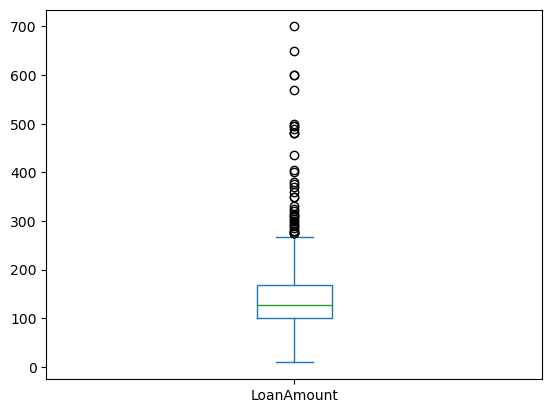

In [16]:
data['LoanAmount'].plot(kind='box')

In [15]:
data['LoanAmount'].mean().round(2)

AttributeError: 'float' object has no attribute 'round'

In [ ]:
data['LoanAmount'].fillna(value=146.11)

#### Mean imputation Pros and Cons
##### Pros:

- Simple and easy to implement.
- Preserves the sample size and avoids bias in the mean of the data.
- Can be used for both continuous and categorical data (by converting the data to a numeric format).

##### Cons:
- Mean imputation assumes that the data are missing completely at random (MCAR), which may not always be the case in practice.
- Mean imputation can distort the distribution of the data, especially if there are extreme values or outliers in the data.
Mean imputation can lead to underestimation of the variance or standard deviation of the data, which can affect subsequent statistical analyses.
- Mean imputation can result in biased estimates and inaccurate results, especially if the missing data are not missing at random (MNAR).

### Using sklearn library SimpleImputer method

`missing_values = [np.nan, '?', 'missing_value']`
`strategy = ['mean', 'mode', 'most_frequent']`

`object_name = SimpleImputer(`

    missing_values=choose one from the missing values list based on your dataset,
    strategy=choose one from the missing values list based on your datatype of that column
    )`
    

In [ ]:
from sklearn.impute import SimpleImputer

object_impute1 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
object_impute2 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='Male')

object_impute1.fit_transform(data[['Gender']])
object_impute2.fit_transform(data[['Gender']])

In [ ]:
mean_impute = SimpleImputer(missing_values=np.nan, strategy='mean')
median_impute = SimpleImputer(missing_values=np.nan, strategy='median')

mean_impute.fit_transform(data[['LoanAmount']]).round(2)

median_impute.fit_transform(data1[['Age']]).astype('int64')

print('done')

In [ ]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=7, weights='distance')

knn_imputer.fit_transform(data[['LoanAmount']])